In [419]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

In [420]:
df = pd.read_csv('housing.csv')

In [421]:
df.head()

,Price,Beds,Baths,Sqft
0,"$255,000",3bed,2bath,"1,214sqft"
1,"$495,000",4bed,2.5bath,"3,099sqft"
2,"$425,000",4bed,2bath,"1,669sqft"
3,"$279,000",3bed,1.5bath,"1,140sqft"
4,"$570,000",3bed,2bath,"1,801sqft"


In [422]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   42 non-null     object
 1   Beds    42 non-null     object
 2   Baths   42 non-null     object
 3   Sqft    42 non-null     object
dtypes: object(4)
memory usage: 1.4+ KB


In [423]:
df.describe()

,Price,Beds,Baths,Sqft
count,42,42,42,42
unique,41,6,8,42
top,"$310,000",4bed,2bath,"1,214sqft"
freq,2,15,22,1


In [424]:
#df["Price"] = pd.to_numeric(df["Price"], errors='coerce').fillna(0, downcast='infer')
#df["Beds"] = pd.to_numeric(df["Beds"], errors='coerce').fillna(0, downcast='infer')
#df["Baths"] = pd.to_numeric(df["Baths"], errors='coerce').fillna(0, downcast='infer')
#df["Sqft"] = pd.to_numeric(df["Sqft"], errors='coerce').fillna(0, downcast='infer')
#df1 = pd.get_dummies(df['Price'])

def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

df['Price'] = df['Price'].apply(clean_currency).astype('float')


In [425]:
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('bed', '').replace(',', ''))
    return(x)

df['Beds'] = df['Beds'].apply(clean_currency).astype('float')

In [426]:
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('bath', '').replace(',', ''))
    return(x)

df['Baths'] = df['Baths'].apply(clean_currency).astype('float')

In [427]:
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('sqft', '').replace(',', ''))
    return(x)

df['Sqft'] = df['Sqft'].apply(clean_currency).astype('float')

In [428]:
df.head()

,Price,Beds,Baths,Sqft
0,255000.000,3.000,2.000,1214.000
1,495000.000,4.000,2.500,3099.000
2,425000.000,4.000,2.000,1669.000
3,279000.000,3.000,1.500,1140.000
4,570000.000,3.000,2.000,1801.000


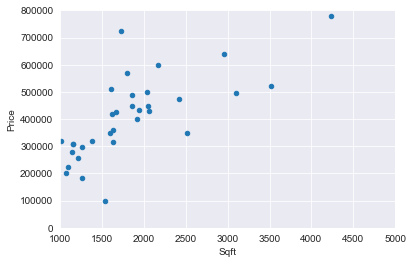

In [429]:
var = 'Sqft'
data = pd.concat([df['Price'], df[var]], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(0,800000),xlim=(1000,5000));


 mu = 444116.40 and sigma = 245833.54



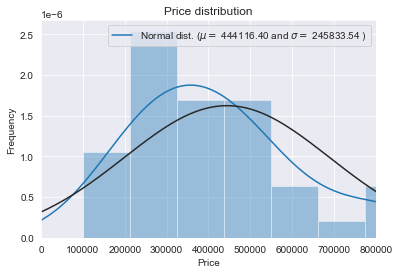

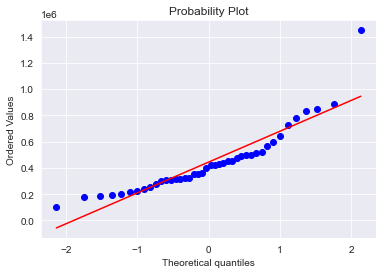

In [430]:
sns.distplot(df['Price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['Price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')
plt.xlim(0,800000)

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['Price'], plot=plt)
plt.show()

<AxesSubplot:>

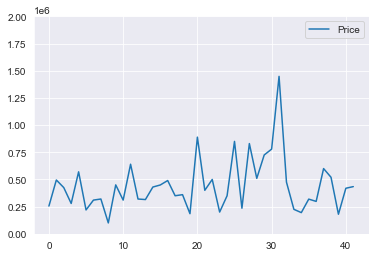

In [431]:
#Y = Price up to 2 million
df.plot.line(y='Price', use_index=True, ylim=(0,2000000))

In [ ]:
X = df[['Beds','Baths','Sqft']]

In [ ]:
y = df['Price']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101) 

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(lm.intercept_)

-238755.32659040578


In [ ]:
lm.coef_

array([ -6482.81941995, 116197.54074141,    232.09002974])

In [444]:
predictions = lm.predict(X_test)

In [ ]:
predictions

array([ 745054.24975067,   50597.07775059,  790464.33142108,
        515825.56330202,  367831.68848609,  180675.1601666 ,
        234348.51855943, 1003862.7345141 ,  352265.95508065,
       1112636.69552718,  196517.84371164,   59664.29032328,
        424445.9543301 ,  201887.31722128,  331206.32389688,
        337892.0746495 ,  413321.33431533])

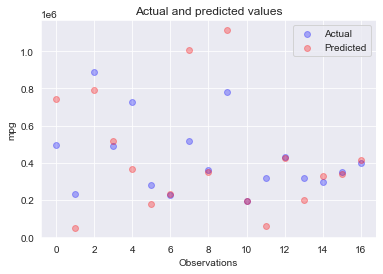

In [ ]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, predictions.size), y=predictions, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('mpg')
plt.legend()
plt.show()

In [441]:
y_test

1    495000.000
26   235500.000
20   889000.000
16   489900.000
29   725000.000
3    279000.000
33   225000.000
38   520000.000
18   359900.000
30   779000.000
34   194900.000
35   319000.000
41   434000.000
7    320000.000
36   298000.000
24   349999.000
21   400000.000
Name: Price, dtype: float64